# Project Group 35

Members: Mathijs Kop, Roos Wentges, Irene Bosman, Sathvik Gadiraju, Sophie Pijnenburg

Student numbers: 5095433, 4869419 , 4882237, 6084435 , 4851404

# Research Objective

*Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*

In the recent years, fuel cost have undergone substatantial increases due to geopolitical devlopements and policy changes. The rising fuel prices becoming a prevalent concern for individuals and this could impact the human mobility behaviour. This study investigates the relationship between the increasing fual prices and the choices people make in terms of there travel behaviour, especially fuel based travelling.

Therefore, the research question in this data analysis is: 

*What relation can be found between rising fuel costs and mobility behaviour from 2018 to 2022?*

Subquestions:
- How have fuel prices developed in the considered time in the Netherlands?
- How have the mobility motives developed in the considered time in the Netherlands?
- What is the general mobility trend?
- What is the correlation between the fuel prices and the mobility motives?

Geographical boundary: The Netherlands

Time scale:  2018-2022

# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Author 1**:

**Author 2**:

**Author 3**:

# Data Used

CBS: https://opendata.cbs.nl/#/CBS/en/dataset/84710ENG/table?ts=1696337832049
https://opendata.cbs.nl/#/CBS/en/dataset/80416ENG/table?ts=1696337975859
https://opendata.cbs.nl/statline/#/CBS/en/dataset/84755ENG/table?ts=1696338796089

# Data Pipeline

From the first link we will look into distance traveled in passenger kilometres for different travel motives. 
From the second link we will look into the mean fuel prices per year, to compare with the distance traveled. The third link can be used to find the general mobility trend for the different travel motives over the years. 


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import seaborn as sns
import warnings

In [104]:
from pandas import read_csv

# Subquestion 1: How have fuel prices developed in the considered time in the Netherlands?
Fuel prices can develop a lot throughout the year and in between years, in this subquestion the variations in fuel prices is analysed. The data is retrieved from CBS and the fuel prices of Euro95, Diesel and LPG are available on a daily basis. In this question the monthly values are considered and a visualisation is made out of the available data from 2018 until 2022. The changes in fuel prices can have multiple reasons and can be explained from different perspectives, such as environmental regulations, big global events, exchange rates and political events. 

In [105]:

df = read_csv('fuelprices.csv', skiprows = 5, delimiter = ';', index_col = 0, parse_dates=True, infer_datetime_format=True)

data = df.dropna().rename({'euro/liter':'Euro95','euro/liter.1':'Diesel', 'euro/liter.2':'LPG' }, axis=1)

data.index.names = ['Months']

data.index = pd.to_datetime(data.index)

warnings.filterwarnings("ignore", message="The argument 'infer_datetime_format' is deprecated.*", category=FutureWarning) #ignore warning

data['Average'] = data.mean(axis=1) #Add Average price 
data.head(10)

,Euro95,Diesel,LPG,Average
Months,,,,
2018-01-01,1.589,1.292,0.696,1.192333
2018-02-01,1.566,1.254,0.667,1.162333
2018-03-01,1.545,1.260,0.654,1.153000
2018-04-01,1.608,1.301,0.663,1.190667
2018-05-01,1.668,1.360,0.675,1.234333
2018-06-01,1.660,1.362,0.681,1.234333
2018-07-01,1.661,1.356,0.688,1.235000
2018-08-01,1.683,1.359,0.692,1.244667
2018-09-01,1.680,1.384,0.714,1.259333


Text(0.5, 1.0, 'Fuel prices per month in the Netherlands')

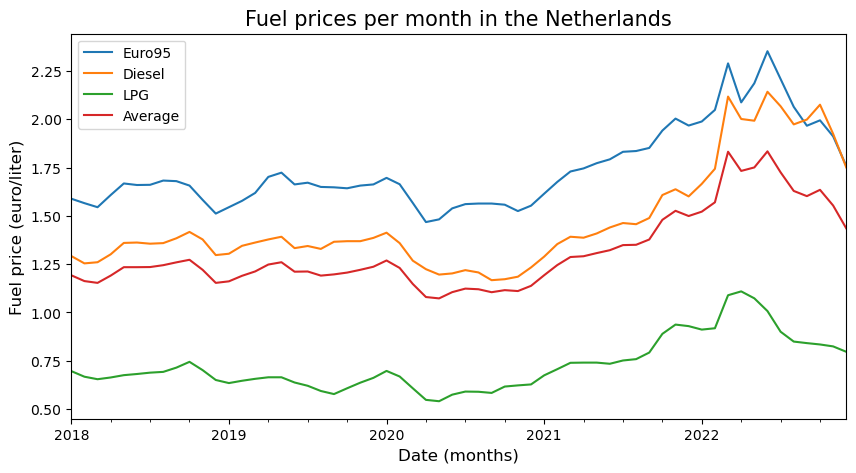

In [106]:
data.plot(figsize=(10,5))
plt.ylabel('Fuel price (euro/liter)', fontsize=12)
plt.xlabel('Date (months)', fontsize=12)
plt.title('Fuel prices per month in the Netherlands', fontsize=15)

The figure shows the change in fuel prices per month between 2018 and 2023. Until 2022 the fuel price increased for all the different types of fuel as can be concluded from the graph. The grade of the increase was almost parallel when comparing the lines of the different fuels. From 2018 to 2021, fuel prices exhibited a degree of stability, with relatively consistent pricing patterns. However, during this period, there were occassions of both lower and higher price fluctuations, indicating that the fuel market experienced variations in pricing. Between 2021 and 2022, the prices on the market increased. From 2022, all the fuel prices has been decreasing and for a couple of months the price of diesel was higher than Euro95. Overall, there can be concluded that the fuel prices differ from time to time and that the rise occurs mostly between 2021 and 2022.

In [107]:
data_yearly = data.resample('Y').mean() 
data_yearly['Average'] = data_yearly.mean(axis=1)
data.index.names = ['Year']
data_yearly['Year'] = data_yearly.index.strftime('%Y')
data_yearly = data_yearly.set_index('Year')
data_yearly.reset_index(level=0, inplace=True)
data_yearly

,Year,Euro95,Diesel,LPG,Average
0,2018,1.617667,1.335000,0.685417,1.212694
1,2019,1.647000,1.356417,0.632917,1.212111
2,2020,1.561833,1.237083,0.605000,1.134639
3,2021,1.813917,1.460583,0.782417,1.352306
4,2022,2.071917,1.954917,0.929250,1.652028


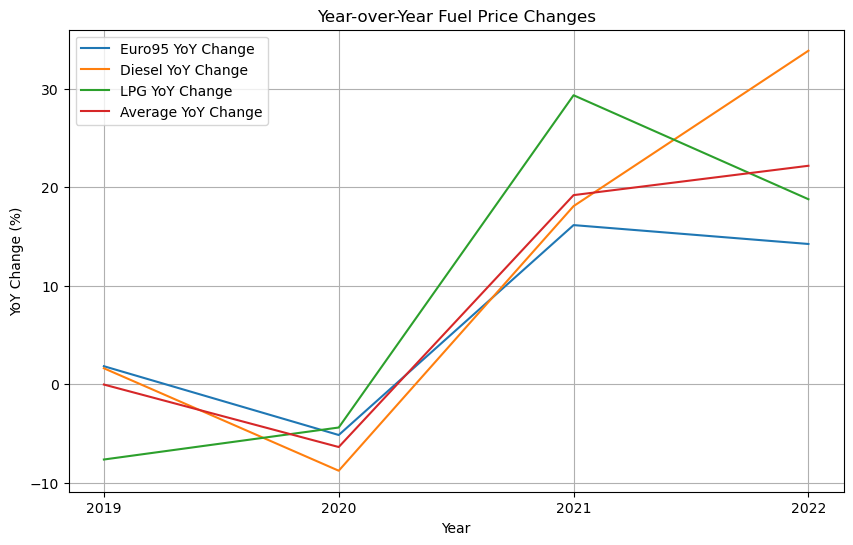

In [108]:
data_yearly['Euro95_YoY'] = data_yearly['Euro95'].pct_change() * 100
data_yearly['Diesel_YoY'] = data_yearly['Diesel'].pct_change() * 100
data_yearly['LPG_YoY'] = data_yearly['LPG'].pct_change() * 100
data_yearly['Average_YoY'] = data_yearly['Average'].pct_change() * 100

# Plot the YoY changes
plt.figure(figsize=(10, 6))
plt.plot(data_yearly['Year'], data_yearly['Euro95_YoY'], label='Euro95 YoY Change')
plt.plot(data_yearly['Year'], data_yearly['Diesel_YoY'], label='Diesel YoY Change')
plt.plot(data_yearly['Year'], data_yearly['LPG_YoY'], label='LPG YoY Change')
plt.plot(data_yearly['Year'], data_yearly['Average_YoY'], label='Average YoY Change')
plt.xlabel('Year')
plt.ylabel('YoY Change (%)')
plt.title('Year-over-Year Fuel Price Changes')
plt.legend()
plt.grid(True)
plt.show()

In this graph, It can be seen that LPG has had a slightly divergent development in terms of price in recent years. Diesel and Euro95 are going through a similar development. However, from 2021 the price of diesel has been increasing all along, possibly because of the war between Russia and Ukraine.The price of Euro95 has dropped a little, the price of LPG has experienced a significant drop.

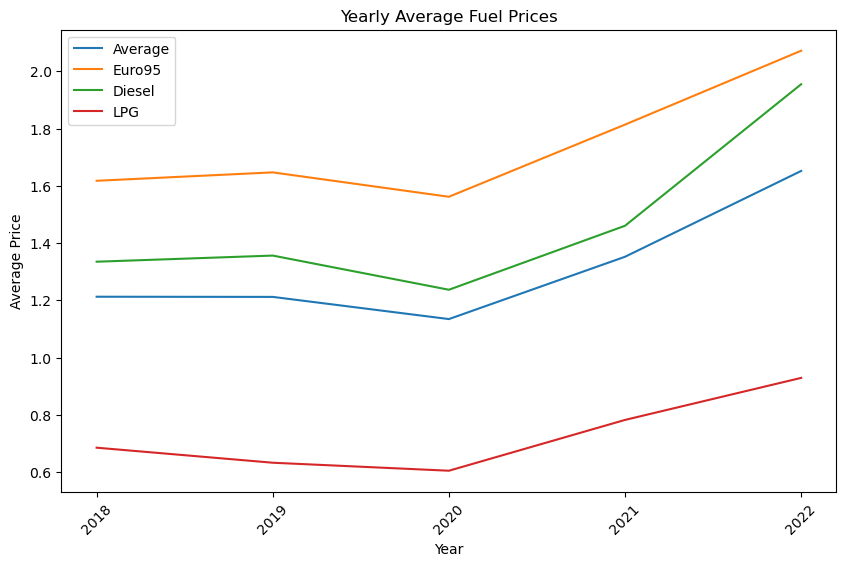

In [109]:
fueltypes = ["Year", "Euro95", "Diesel", "LPG", "Average"]

plt.figure(figsize=(10, 6)) 

sns.lineplot(x='Year', y='Average', data=data_yearly, label='Average')
sns.lineplot(x='Year', y='Euro95', data=data_yearly, label='Euro95')
sns.lineplot(x='Year', y='Diesel', data=data_yearly, label='Diesel')
sns.lineplot(x='Year', y='LPG', data=data_yearly, label='LPG')

plt.title('Yearly Average Fuel Prices')
plt.xlabel('Year')
plt.ylabel('Average Price')

plt.xticks(rotation=45)

plt.legend() 

plt.show()

# Subquestion 2: How have the mobility motives developed in the considered time in the Netherlands?
In this subquestion the mobility trends found in the data from the CBS is explored. The yearly data is visualised in  bar charts. First the average amount of trips per day for every vehicle combined in 2022 and after that this is also done for the years 2018 till 2022.

In [110]:
mobility_trips = read_csv('mobility_perday.csv', index_col = 1, skiprows = 6, delimiter = ';', usecols = [0,1,2,3,4,5,6])
mobility_trips = mobility_trips.dropna()
mobility_trips = mobility_trips.drop('Travel modes')
mobility_trips = mobility_trips.rename({'Unnamed: 0':'motive'}, axis=1)
display(mobility_trips.head())

,motive,2018,2019,2020,2021,2022
Periods,,,,,,
Total,Total,2.78,2.71,2.35,2.51,2.70
Passenger car (driver),Total,0.96,0.95,0.81,0.82,0.87
Train,Total,0.08,0.08,0.03,0.03,0.05
Bike,Total,0.79,0.76,0.63,0.64,0.75
Walking,Total,0.44,0.43,0.52,0.61,0.58


In [111]:
# does not work yet
years = ['2018', '2019', '2020', '2021', '2022']

mobility_trend = mobility_trips[mobility_trips['motive'] == 'Total']
mobility_trend_years = mobility_trend[years].reset_index()
melted_mobility_trend = mobility_trend_years.melt(id_vars='Periods', var_name='year', value_name='trips')

melted_mobility_trend['trips'] = melted_mobility_trend['trips'].astype(float)

figure = px.line(melted_mobility_trend, x='year', y='trips', color='Periods')
figure.update_layout(title={
    'text': f'Average amount of trips per mode of transport per year',
    'x': 0.5
})
# figure.update_yaxes(range=[0, 3]) 
figure.show()


#Pls try plotting this after calculating YoY changes

In [112]:
#The average amount of trips per day for every vehicle combined in 2022
year = '2022'

mobility_trips_total = mobility_trips[mobility_trips.index=="Total"]
mobility_trips_motive = mobility_trips_total.set_index(['motive']).sort_values(year)
fig = px.bar(mobility_trips_motive.sort_values(year), x=year, y=mobility_trips_motive.sort_values(year).index, 
             orientation='h', color = mobility_trips_motive.sort_values(year).index, )
fig.update_layout(title={
    'text': f'Average amount of trips per day for every vehicle combined in {year}',
    'x': 0.5
}, xaxis_range=[0, 5])
fig.show()

This bar chart shows the number of trips per mobility motive. The biggest share is shopping, groceries and funshopping.

In [113]:

mobility_trips_years = mobility_trips_motive[years]
display(mobility_trips_motive)
display(mobility_trips_years)


# Melt the data to create a 'year' column
mobility_trips_years = mobility_trips_years.reset_index().melt(id_vars=['motive'], var_name='year', value_name='trips')

fig = px.bar(mobility_trips_years, x='trips', y='motive', color='motive', facet_col='year', orientation='h', hover_name='trips')

fig.update_layout(title={
    'text': 'Average amount of trips for every vehicle combined per day from 2018 to 2022',
    'x': 0.5
})
fig.update_yaxes(title_text="Travel motives")
fig.show()

,2018,2019,2020,2021,2022
motive,,,,,
Professionally,0.07,0.11,0.07,0.08,0.08
Services/care,0.09,0.09,0.07,0.09,0.09
Attending education/courses,0.23,0.22,0.14,0.14,0.18
"Travel to/from work, (non)-daily commute",0.55,0.50,0.37,0.37,0.42
"Shopping, groceries, funshopping.",0.56,0.54,0.55,0.56,0.58
Total,2.78,2.71,2.35,2.51,2.70


,2018,2019,2020,2021,2022
motive,,,,,
Professionally,0.07,0.11,0.07,0.08,0.08
Services/care,0.09,0.09,0.07,0.09,0.09
Attending education/courses,0.23,0.22,0.14,0.14,0.18
"Travel to/from work, (non)-daily commute",0.55,0.50,0.37,0.37,0.42
"Shopping, groceries, funshopping.",0.56,0.54,0.55,0.56,0.58
Total,2.78,2.71,2.35,2.51,2.70


In [114]:
fig2 = px.histogram(mobility_trips_years, x='trips', y='motive', color='motive',  orientation='h',  animation_frame='year')

fig2.update_layout(title={
    'text': 'Average amount of trips for every vehicle combined per day from 2018 to 2022',
    'x': 0.5
})

fig2.update_yaxes(title_text="Travel motives")
fig2.show()

This bar plots the same as the previous one, but for the entire given time scale. It can be seen that for all motives a substantial drop can be seen in 2020 due to the Corona virus. But if looked at before and after the Corona virus, the motive 'shopping, groceries and funshopping' is increased, but the other substantial shares of motives have descreased.